In [39]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [40]:
def quaternion_angular_error(q1, q2):
    """
    angular error between two quaternions
    :param q1: (4, )
    :param q2: (4, )
    :return:
    """
    d = abs(np.dot(q1, q2))
    d = min(1.0, max(-1.0, d))
    theta = 2 * np.arccos(d) * 180 / np.pi
    return theta

In [41]:
def rotation_error(truth_rotation, predicted_rotation, is_print=True):
    rotation_errors = [quaternion_angular_error(q1, q2) for q1, q2 in zip(truth_rotation, predicted_rotation)]
    rotation_errors = np.array(rotation_errors)
    if is_print:
        print("Mean rotation error: {}".format(np.mean(rotation_errors)))
        print("Median rotation error: {}".format(np.median(rotation_errors)))
    return np.mean(rotation_errors), np.median(rotation_errors)

In [56]:
def make_lines(markers1, markers2):
    result = []
    for x1, x2 in zip(markers1, markers2):
        result.append(x1)
        result.append(x2)
        result.append(None)
    return result

def show_trajectories(shown_truth_trajectory, shown_predicted_trajectory):
    fig = go.Figure(
        data=[
            go.Scatter3d(x=shown_truth_trajectory[:, 0],
                         y=shown_truth_trajectory[:, 1], 
                         z=shown_truth_trajectory[:, 2],
                         mode="markers",
                         name="truth",
                         marker={
                             "size": 2
                         }),
            go.Scatter3d(x=shown_predicted_trajectory[:, 0],
                         y=shown_predicted_trajectory[:, 1],
                         z=shown_predicted_trajectory[:, 2],
                         mode="markers",
                         name="predicted",
                         marker={
                             "size": 2
                         }),
#             go.Scatter3d(x=make_lines(shown_truth_trajectory[:, 0], shown_predicted_trajectory[:, 0]),
#                          y=make_lines(shown_truth_trajectory[:, 1], shown_predicted_trajectory[:, 1]),
#                          z=make_lines(shown_truth_trajectory[:, 2], shown_predicted_trajectory[:, 2]),
#                          mode="lines",
#                          name="errors")
        ]
    )
    fig.show()

# Load data

In [57]:
data = np.load("../metrics/fire_trajectories.npy", allow_pickle=True)
truth_trajectory = data.item()["truth_position"]
predicted_trajectory = data.item()["predicted_position"]
truth_rotation = data.item()["truth_rotation"]
predicted_rotation = data.item()["predicted_rotation"]

In [58]:
position_errors = np.linalg.norm(truth_trajectory - predicted_trajectory, axis=1)
print("Mean position error: {}".format(np.mean(position_errors)))
print("Median position error: {}".format(np.median(position_errors)))

Mean position error: 0.668647825717926
Median position error: 0.6871230006217957


In [59]:
rotation_errors = [quaternion_angular_error(q1, q2) for q1, q2 in zip(truth_rotation, predicted_rotation)]
rotation_errors = np.array(rotation_errors)
print("Mean rotation error: {}".format(np.mean(rotation_errors)))
print("Median rotation error: {}".format(np.median(rotation_errors)))

Mean rotation error: 30.50589749259885
Median rotation error: 25.996959297196753


# Show trajectories

In [60]:
show_trajectories(truth_trajectory, predicted_trajectory)

In [61]:
fig = px.line_3d(x=trajectories[0, :1000, 0], y=trajectories[0, :1000, 1], z=trajectories[0, :1000, 2])
fig.show()

NameError: name 'trajectories' is not defined

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

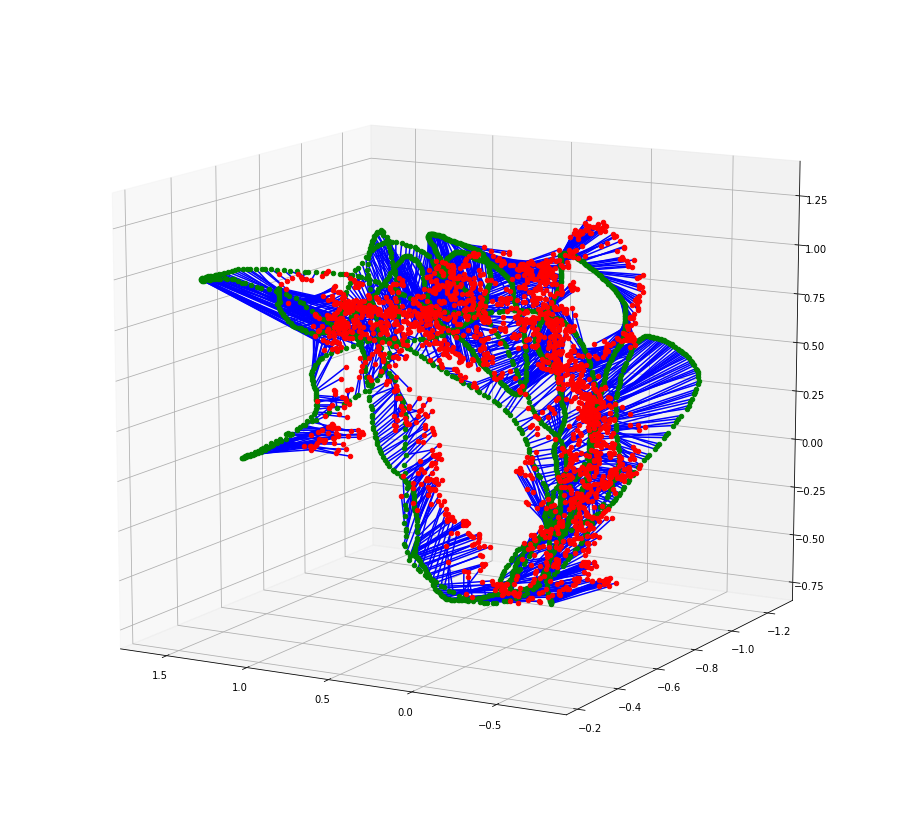

In [11]:
figure = plt.figure(figsize=(35, 15))
ax = figure.add_subplot(1, 2, 2, projection='3d')
ss = 1
pred_poses = predicted_trajectory
targ_poses = truth_trajectory
z = np.vstack((pred_poses[::ss, 2].T, targ_poses[::ss, 2].T))
x = np.vstack((pred_poses[::ss, 0].T, targ_poses[::ss, 0].T))
y = np.vstack((pred_poses[::ss, 1].T, targ_poses[::ss, 1].T))
for xx, yy, zz in zip(x.T, y.T, z.T):
    ax.plot(xx, yy, zs=zz, c='b')
ax.scatter(x[0, :], y[0, :], zs=z[0, :], c='r', depthshade=0)
ax.scatter(x[1, :], y[1, :], zs=z[1, :], c='g', depthshade=0)
ax.view_init(azim=119, elev=13)

In [12]:
np.median(np.linalg.norm(pred_poses - targ_poses, axis=1))

0.5474592355124048

In [26]:
def qexp(q):
    """
    Applies the exponential map to q
    :param q: (3,)
    :return: (4,)
    """
    n = np.linalg.norm(q)
    q = np.hstack((np.cos(n), np.sinc(n/np.pi)*q))
    return q

In [24]:
def quaternion_angular_error(q1, q2):
    """
    angular error between two quaternions
    :param q1: (4, )
    :param q2: (4, )
    :return:
    """
    d = abs(np.dot(q1, q2))
    d = min(1.0, max(-1.0, d))
    theta = 2 * np.arccos(d) * 180 / np.pi
    return theta